SPOILER: Doesn't work

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [22]:
datafile = "../data/daily/stocks/nyse/ABBV.csv"
df = pd.read_csv(datafile)
df.index = pd.to_datetime(df.date)
df = df[["adj close","volume"]]
df.columns=["lr","volume"]
df.lr = df.lr.pct_change()
df.lr = np.log(df.lr+1)
df.volume = np.log(df.volume)
df = df.dropna()
df.head()

,lr,volume
date,,
2017-08-01,0.006701,15.714883
2017-08-02,0.004678,15.409266
2017-08-03,0.003952,15.297206
2017-08-04,0.000000,15.369964
2017-08-07,0.003235,15.082768


In [23]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)
scaled_features

array([[ 0.3273669 , -0.04490067],
       [ 0.21631185, -0.75117429],
       [ 0.17646279, -1.01014273],
       ...,
       [ 0.06129124, -1.14787622],
       [-0.55139074, -0.08375502],
       [-3.4785788 ,  0.47888655]])

In [24]:
kmeans = KMeans(init="random",n_clusters=3,n_init=10,max_iter=300,random_state=42)
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

In [25]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
}
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

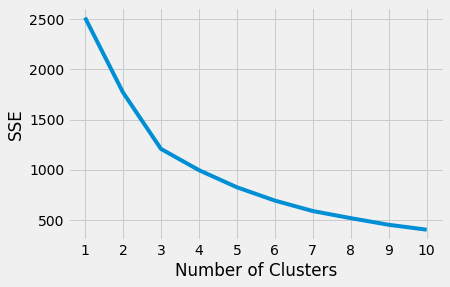

In [26]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [27]:
kl = KneeLocator(
range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

3

In [28]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

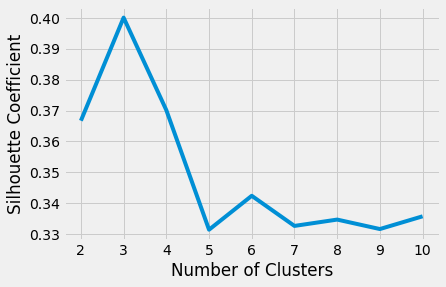

In [29]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

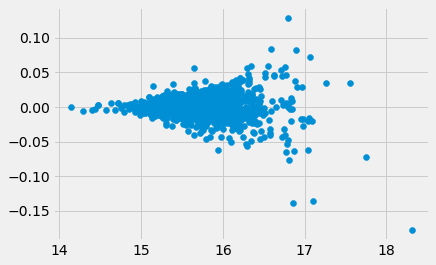

In [30]:
plt.scatter(df["volume"],df["lr"])

In [42]:
kmeans = KMeans(init="random",n_clusters=5,n_init=10,max_iter=300,random_state=42)
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=5, random_state=42)

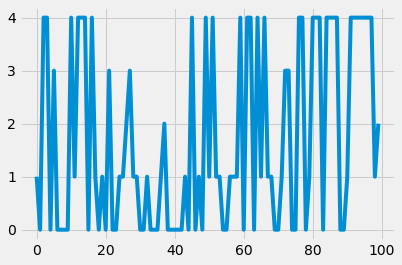

In [43]:
plt.plot(kmeans.labels_[-100:])

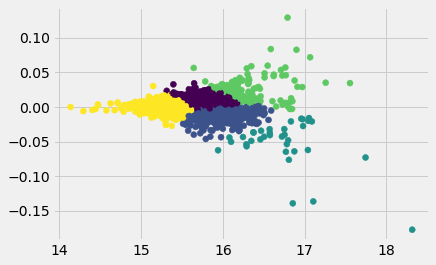

In [44]:
plt.scatter(df["volume"],df["lr"],c=kmeans.labels_.astype(float))